# Проект: Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
    
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Шаг 1. Предобработка данных:**
1) определите и изучите пропущенные значения:
- для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать;
- заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения.
2) приведите данные к нужным типам:
- поясните, в каких столбцах нужно изменить тип данных и почему.

**Шаг 2. Посчитайте и добавьте в таблицу:**
1) цену квадратного метра;
2) день недели, месяц и год публикации объявления;
3) этаж квартиры; варианты — первый, последний, другой;
4) соотношение жилой и общей площади, а также отношение площади кухни к общей.

**Шаг 3. Проведите исследовательский анализ данных и выполните инструкции:**
1) Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
2) Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
3) Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
4) Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
5) Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
6) Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
7) Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('./real_estate_data.csv', sep='\t')
print('Изначально всего данных:', data.shape[0])
data

Изначально всего данных: 23699


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
# посмотрим рандомно наполнение выборки
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5443,16,3290000.0,70.0,2018-12-20T00:00:00,3,2.50,5.0,46.0,1,NaN,...,9.0,NaN,Шлиссельбург,NaN,NaN,NaN,NaN,NaN,NaN,128.0
14999,17,3500000.0,39.0,2018-10-12T00:00:00,1,2.64,9.0,20.1,8,NaN,...,10.7,2.0,Санкт-Петербург,17423.0,16219.0,1.0,368.0,2.0,218.0,14.0
13337,8,7500000.0,69.9,2018-03-13T00:00:00,2,3.27,5.0,43.6,5,NaN,...,11.0,NaN,Санкт-Петербург,24369.0,4725.0,1.0,76.0,0.0,NaN,108.0
4308,3,12700000.0,121.0,2018-03-05T00:00:00,3,3.20,5.0,NaN,3,NaN,...,14.0,NaN,Санкт-Петербург,32838.0,4367.0,0.0,NaN,0.0,NaN,259.0
14701,15,9700000.0,130.0,2017-11-02T00:00:00,4,3.26,7.0,75.0,4,NaN,...,18.0,NaN,Санкт-Петербург,24406.0,4974.0,1.0,330.0,0.0,NaN,145.0
21417,17,10450000.0,109.3,2019-02-25T00:00:00,5,3.30,7.0,67.0,6,False,...,9.5,NaN,Санкт-Петербург,24823.0,5042.0,1.0,711.0,0.0,NaN,21.0
21049,10,13000000.0,75.4,2017-10-13T00:00:00,2,2.50,5.0,37.0,5,NaN,...,17.0,NaN,Санкт-Петербург,22065.0,3331.0,0.0,NaN,1.0,837.0,57.0
6934,6,9000000.0,95.0,2018-09-04T00:00:00,3,NaN,3.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,21166.0,671.0,2.0,367.0,3.0,192.0,85.0
4772,9,2700000.0,62.8,2016-04-27T00:00:00,4,2.50,5.0,45.8,5,NaN,...,6.2,1.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,779.0
21965,9,4100000.0,45.0,2018-02-03T00:00:00,2,NaN,9.0,26.0,1,NaN,...,7.0,NaN,Санкт-Петербург,16110.0,11586.0,0.0,NaN,0.0,NaN,43.0


In [4]:
# взглянем, какие типы данных имеем
# сразу замечаем, что нужно будет first_day_exposition менять на dt тип  
# и is_apartment на bool
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# был прыгающий регистр в названии столбцов, так что сейчас исправим
# также допишем в чем измеряется расстояние в некоторых столбцах
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [6]:
# подправляем названия столбцов
name_columns = ['total_images',
 'last_price',
 'total_area_m2',
 'first_day_exposition',
 'amount_of_rooms',
 'ceiling_height_m',
 'floors_total',
 'living_area_m2',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area_m2',
 'amount_of_balconies',
 'locality_name',
 'airports_nearest_m',
 'city_center_nearest_m',
 'parks_around_3km',
 'park_nearest_m',
 'ponds_around_3km',
 'pond_nearest_m',
 'days_exposition']
data = data.set_axis(name_columns, axis='columns')

In [7]:
# посмотрим, как теперь выглядят столбцы
data.columns.tolist()

['total_images',
 'last_price',
 'total_area_m2',
 'first_day_exposition',
 'amount_of_rooms',
 'ceiling_height_m',
 'floors_total',
 'living_area_m2',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area_m2',
 'amount_of_balconies',
 'locality_name',
 'airports_nearest_m',
 'city_center_nearest_m',
 'parks_around_3km',
 'park_nearest_m',
 'ponds_around_3km',
 'pond_nearest_m',
 'days_exposition']

In [8]:
# для большей наглядности поменяем порядок столбцов
data = data[[
 'locality_name', #название населенного пункта
 'total_area_m2', #площадь квартиры в квадратных метрах (м²)
 'living_area_m2', #жилая площадь в квадратных метрах(м²)
 'kitchen_area_m2', #площадь кухни в квадратных метрах (м²)
 'ceiling_height_m', #высота потолков (м)
 'amount_of_rooms', #число комнат
 'amount_of_balconies', #число балконов
 'floor', #этаж
 'floors_total', #всего этажей в доме
 'is_apartment', #апартаменты (булев тип)
 'is_studio', #квартира-студия (булев тип)
 'is_open_plan', #свободная планировка (булев тип)
 'total_images', #число фотографий квартиры в объявлении
 'last_price', #цена на момент снятия с публикации
 'first_day_exposition', #дата публикации
 'days_exposition', #сколько дней было размещено объявление
 'city_center_nearest_m', #расстояние до центра города (м)
 'airports_nearest_m', #расстояние до ближайшего аэропорта в метрах (м)
 'parks_around_3km', #число парков в радиусе 3 км
 'park_nearest_m', #расстояние до ближайшего парка (м)
 'ponds_around_3km', #число водоёмов в радиусе 3 км
 'pond_nearest_m' #расстояние до ближайшего водоёма (м)
]]

In [9]:
# теперь выглядит более читабельно
data.head()

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,amount_of_rooms,amount_of_balconies,floor,floors_total,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_nearest_m,airports_nearest_m,parks_around_3km,park_nearest_m,ponds_around_3km,pond_nearest_m
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,NaN,...,20,13000000.0,2019-03-07T00:00:00,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,NaN,...,7,3350000.0,2018-12-04T00:00:00,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,NaN,...,10,5196000.0,2015-08-20T00:00:00,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,159.0,NaN,NaN,NaN,3,0.0,9,14.0,NaN,...,0,64900000.0,2015-07-24T00:00:00,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,NaN,...,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0


## шаг. Предобработка данных

In [10]:
data.duplicated().sum()
# дубликатов нет, возможно во время предобработки появятся, посмотрим

0

In [11]:
# выводим столбцы, где есть пропуски
data.columns[data.isnull().any()].tolist()

['locality_name',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'amount_of_balconies',
 'floors_total',
 'is_apartment',
 'days_exposition',
 'city_center_nearest_m',
 'airports_nearest_m',
 'parks_around_3km',
 'park_nearest_m',
 'ponds_around_3km',
 'pond_nearest_m']

In [12]:
# посмотрим количество пропусков
data.isnull().sum().sort_values()

is_studio                    0
total_area_m2                0
first_day_exposition         0
last_price                   0
total_images                 0
amount_of_rooms              0
is_open_plan                 0
floor                        0
locality_name               49
floors_total                86
living_area_m2            1903
kitchen_area_m2           2278
days_exposition           3181
ponds_around_3km          5518
parks_around_3km          5518
city_center_nearest_m     5519
airports_nearest_m        5542
ceiling_height_m          9195
amount_of_balconies      11519
pond_nearest_m           14589
park_nearest_m           15620
is_apartment             20924
dtype: int64

*займемся населенным пунктом (locality_name)*

In [13]:
len(data['locality_name'].unique())
# как-то много вышло, учитывая что квартиры продают в СПб и соседних н.п.

365

In [14]:
# походу имеются дубликаты
# привидем к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()

In [15]:
data['locality_name'].unique().tolist()
# видна проблема с буквой Е и Ё

['санкт-петербург',
 'посёлок шушары',
 'городской посёлок янино-1',
 'посёлок парголово',
 'посёлок мурино',
 'ломоносов',
 'сертолово',
 'петергоф',
 'пушкин',
 'деревня кудрово',
 'коммунар',
 'колпино',
 'поселок городского типа красный бор',
 'гатчина',
 'поселок мурино',
 'деревня фёдоровское',
 'выборг',
 'кронштадт',
 'кировск',
 'деревня новое девяткино',
 'посёлок металлострой',
 'посёлок городского типа лебяжье',
 'посёлок городского типа сиверский',
 'поселок молодцово',
 'поселок городского типа кузьмоловский',
 'садовое товарищество новая ропша',
 'павловск',
 'деревня пикколово',
 'всеволожск',
 'волхов',
 'кингисепп',
 'приозерск',
 'сестрорецк',
 'деревня куттузи',
 'посёлок аннино',
 'поселок городского типа ефимовский',
 'посёлок плодовое',
 'деревня заклинье',
 'поселок торковичи',
 'поселок первомайское',
 'красное село',
 'посёлок понтонный',
 'сясьстрой',
 'деревня старая',
 'деревня лесколово',
 'посёлок новый свет',
 'сланцы',
 'село путилово',
 'ивангород',
 '

In [16]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

In [17]:
# таким способом убрали 34 дубля
len(data['locality_name'].unique())

331

In [18]:
# теперь глянем, сколько имеем пропусков
len(data[data['locality_name'].isna()])

49

In [19]:
# пропущенные населенные пункты удалим, их немного и они будут потом мешаться
# в исследовании (+ покупателям не будет понятно, где продается квартира)
data.dropna(subset=['locality_name'], inplace=True)

len(data[data['locality_name'].isna()])

0

*займемся теперь площадями в квартире (total_area_m2, living_area_m2, kitchen_area_m2)*

In [20]:
# глянем, сколько имеем пропусков
len(data[data['living_area_m2'].isna()])

1898

In [21]:
# заполняем пропуски через среднее соотношение с общей площадью (жилая/общая)
data['living_area_m2'] = data['living_area_m2'].fillna(
    data['total_area_m2'] * data['living_area_m2'].median() / data['total_area_m2'].median()
    )
len(data[data['living_area_m2'].isna()])

0

In [22]:
# глянем, сколько имеем пропусков
len(data[data['kitchen_area_m2'].isna()])

2269

In [23]:
# заполняем через соотношение кухонной площади к общей, как с жилой
data['kitchen_area_m2'] = data['kitchen_area_m2'].fillna(
    data['total_area_m2'] * data['kitchen_area_m2'].median() / data['total_area_m2'].median()
)
len(data[data['kitchen_area_m2'].isna()])

0

In [24]:
# смотрим, где у нас сумма жилой и кухонной площади больше чем площадь 
# самой квартиры
area_sum = data['living_area_m2'] + data['kitchen_area_m2']

len(data[area_sum >= data['total_area_m2']])

191

In [25]:
# избавимся от этих строк
data = data[area_sum <= data['total_area_m2']]

*займемся высотой потолков (ceiling_height_m)*

In [26]:
# глянем, сколько имеем пропусков
len(data[data['ceiling_height_m'].isna()])

9106

In [27]:
# перед тем, как заполнить такое большое количество пропусков, нужно убедиться
# в корректности данных
data['ceiling_height_m'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [28]:
# по СНиП высота помещений от пола до потолка - не менее 2,5 м, 
# а по нашим данным имеются меньше
print(len(data.query('ceiling_height_m < 2.5')))

73


In [29]:
# и точно потолки не могут быть больше 5 м
print(len(data.query('ceiling_height_m > 5')))

33


In [30]:
# обнулим такие значения
data.loc[(
    data['ceiling_height_m'] < 2.5) | (data['ceiling_height_m'] > 5
                                      ), 'ceiling_height_m'] = None
data['ceiling_height_m'].describe()

count    14317.000000
mean         2.726618
std          0.270296
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height_m, dtype: float64

In [31]:
# глянем, сколько имеем пропусков
len(data[data['ceiling_height_m'].isna()])

9212

In [32]:
# находим медиану высоты потолков(количественные данные)
# заменяем пропуски в ceiling_height_m
data['ceiling_height_m'].fillna(data['ceiling_height_m'].median(), inplace=True)
len(data[data['ceiling_height_m'].isna()])

0

*займемся количеством балконов (amount_of_balconies)*

In [33]:
# глянем, сколько имеем пропусков
len(data[data['amount_of_balconies'].isna()])

11466

In [34]:
data['amount_of_balconies'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [35]:
# если не указано число балконов, предположим, что их нет
data['amount_of_balconies'].fillna(0, inplace=True)
len(data[data['amount_of_balconies'].isna()])

0

In [36]:
# также для количества балконов больше подходит тип данных для работы с 
# целыми числами, чем с числами с плавающей точкой
data['amount_of_balconies'] = data['amount_of_balconies'].astype('int')
data['amount_of_balconies'].info()

<class 'pandas.core.series.Series'>
Index: 23529 entries, 0 to 23698
Series name: amount_of_balconies
Non-Null Count  Dtype
--------------  -----
23529 non-null  int32
dtypes: int32(1)
memory usage: 275.7 KB


In [37]:
data['amount_of_balconies'].value_counts()
# выглядит нормально

amount_of_balconies
0    15174
1     4166
2     3625
5      303
4      182
3       79
Name: count, dtype: int64

*займемся этажами в доме (floors_total, floor)*

In [38]:
# глянем, сколько имеем пропусков
len(data[data['floors_total'].isna()])

85

In [39]:
# смотрим, есть ли где этаж квартиры больше количества этажей в доме
len(data.query('floor > floors_total', engine='python'))

0

In [40]:
# удалим строки,где не указано количество этажей, т.к. их немного (а угадать, 
# сколько их, мы не можем)
data.dropna(subset = ['floors_total'], inplace = True)
len(data[data['floors_total'].isna()])

0

In [41]:
data['floors_total'].value_counts()

floors_total
5.0     5757
9.0     3751
16.0    1362
12.0    1355
4.0     1187
10.0    1171
25.0    1064
6.0      902
17.0     828
3.0      660
7.0      586
14.0     551
18.0     496
24.0     457
8.0      387
2.0      379
15.0     365
23.0     348
19.0     336
22.0     282
20.0     271
13.0     227
11.0     200
27.0     163
21.0     157
26.0     124
1.0       25
35.0      23
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: count, dtype: int64

In [42]:
# самое высокое жилое здание в СПб имеет 37 этажей, так что уберем, что выше
data = data.query('floors_total <= 37')
# также видим, что есть один дом с количеством этажей 5.5, уберем и его
data = data.query('floors_total != 5.5')

In [43]:
# заменим тип данных на int
data['floors_total'] = data['floors_total'].astype('int')
data['floors_total'].info() 

<class 'pandas.core.series.Series'>
Index: 23442 entries, 0 to 23698
Series name: floors_total
Non-Null Count  Dtype
--------------  -----
23442 non-null  int32
dtypes: int32(1)
memory usage: 274.7 KB


In [44]:
data['floors_total'].value_counts()
# вяглядит нормально

floors_total
5     5757
9     3751
16    1362
12    1355
4     1187
10    1171
25    1064
6      902
17     828
3      660
7      586
14     551
18     496
24     457
8      387
2      379
15     365
23     348
19     336
22     282
20     271
13     227
11     200
27     163
21     157
26     124
1       25
35      23
28      21
36       3
34       1
29       1
33       1
37       1
Name: count, dtype: int64

*займемся булевыми данными (is_apartment, is_open_plan, is_studio)*

In [45]:
# глянем, сколько имеем пропусков
len(data[data['is_apartment'].isna()])

20706

In [46]:
# апартаменты редко встречаются, и их отсутствие можно считать признаком того, 
# что это обычная квартира (булев тип данных - категориальные данные)
data['is_apartment'].fillna(False, inplace=True)
len(data[data['is_apartment'].isna()])

0

In [47]:
# так как мы убрали пропуски, тип данных исправился с object на bool
data[['is_apartment', 'is_open_plan', 'is_studio']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 23442 entries, 0 to 23698
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   is_apartment  23442 non-null  bool 
 1   is_open_plan  23442 non-null  bool 
 2   is_studio     23442 non-null  bool 
dtypes: bool(3)
memory usage: 251.8 KB


In [48]:
print(data['is_apartment'].value_counts())
print(data['is_open_plan'].value_counts())
print(data['is_studio'].value_counts())
# выглядит хорошо

is_apartment
False    23394
True        48
Name: count, dtype: int64
is_open_plan
False    23380
True        62
Name: count, dtype: int64
is_studio
False    23311
True       131
Name: count, dtype: int64


*займемся теперь датами (days_exposition, first_day_exposition)* 

In [49]:
# исправим тип данных у даты публикации
print(data['first_day_exposition'].head(3))

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
Name: first_day_exposition, dtype: object


In [50]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],
                                             format='%Y-%m-%dT%H:%M:%S')
# также отбросим время, раз оно не записано
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1D')
data['first_day_exposition'].info()

<class 'pandas.core.series.Series'>
Index: 23442 entries, 0 to 23698
Series name: first_day_exposition
Non-Null Count  Dtype         
--------------  -----         
23442 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 366.3 KB


In [51]:
print(data['first_day_exposition'].min())
print(data['first_day_exposition'].max())
# первые объявления появились аж с конца 2014 года, а последнее объявление в 
# мае 2019 года

2014-11-27 00:00:00
2019-05-03 00:00:00


In [52]:
# глянем, сколько имеем пропусков
len(data[data['days_exposition'].isna()])
# данные пропуски нам сообщают о том, что объявление ещё не снято, 
# т.е. ещё в продаже

3158

In [53]:
# отбираем вразброс строки, где количество дней публикации больше 1000, и 
# смотрим когда их опубликовали 
print(data.loc[data['days_exposition'] > 1000, 
               ['days_exposition', 'first_day_exposition']].sample(10))
print('Количество таких данных:', len(data.loc[data['days_exposition'] > 1000, 
               ['days_exposition', 'first_day_exposition']]))

       days_exposition first_day_exposition
23055           1130.0           2016-03-18
12706           1214.0           2015-01-21
12201           1368.0           2015-01-20
22204           1150.0           2015-09-20
3251            1315.0           2015-03-10
11728           1037.0           2015-04-07
17316           1065.0           2016-02-16
7287            1277.0           2014-12-25
18365           1103.0           2015-11-06
15879           1141.0           2015-03-10
Количество таких данных: 274


In [54]:
# смотрим есть ли среди них данные, которые не сойдутся по датам
len(data.query('days_exposition>1000 and first_day_exposition>"2017-01-01"'))
# таких нет)

0

*займемся расстоянием до центра города и аэропорта (city_center_nearest_m, airports_nearest_m)*

In [55]:
# глянем, сколько имеем пропусков
len(data[data['city_center_nearest_m'].isna()])
# если вспомнить, что часть информации была получена на основании 
# картографических данных, мы не сможем заполнить пропуски расчетами 
# самостоятельно, а удалять нельзя(немало пропусков)

5465

In [56]:
# глянем, сколько имеем пропусков
len(data[data['airports_nearest_m'].isna()])

5488

In [57]:
# посмотрим, есть ли квартиры меньше чем на расстоянии 300м
data.query('airports_nearest_m <= 300')

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,amount_of_rooms,amount_of_balconies,floor,floors_total,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_nearest_m,airports_nearest_m,parks_around_3km,park_nearest_m,ponds_around_3km,pond_nearest_m
21085,санкт-петербург,34.7,19.8,6.0,2.7,1,2,3,9,False,...,0,7000000.0,2018-09-23,60.0,22801.0,0.0,0.0,NaN,0.0,NaN


In [58]:
# есть одна квартира, которая на расстоянии 0 метров
# избавимся от нее, так как не может быть квартиры внутри аэропорта
data = data.query('airports_nearest_m != 0')

*займемся расстояниями до парков и водоёмов ('parks_around_3km', 'park_nearest_m', 'ponds_around_3km', 'pond_nearest_m')*

In [59]:
# глянем, сколько имеем пропусков
print('Пропуски в "число парков в радиусе 3 км":', len(data[data['parks_around_3km'].isna()]))
print('Пропуски в "расстояние до ближайшего парка":', len(data[data['park_nearest_m'].isna()]))
print('Пропуски в "число водоёмов в радиусе 3 км":', len(data[data['ponds_around_3km'].isna()]))
print('Пропуски в "расстояние до ближайшего водоёма":', len(data[data['pond_nearest_m'].isna()]))
# заполнить пропуски до ближайшего пруда или парка мы не можем, также как 
# и с расстоянием до центра города

Пропуски в "число парков в радиусе 3 км": 5464
Пропуски в "расстояние до ближайшего парка": 15449
Пропуски в "число водоёмов в радиусе 3 км": 5464
Пропуски в "расстояние до ближайшего водоёма": 14450


In [60]:
# проверим есть ли квартиры, где указан парк в радиусе 3км, а расстояние 
# до ближайшего парка больше
(data.query(
    'park_nearest_m > 3000 and parks_around_3km != 0')
 ['parks_around_3km'].count())

0

In [61]:
# проверим тоже самое с водоёмами
(data.query(
    'pond_nearest_m > 3000 and ponds_around_3km != 0')
 ['ponds_around_3km'].count())

0

In [62]:
# предположим, как с балконами, что если пропущены данные с количеством 
# парков и водоёмов в радиусе 3км, то значит их нет (и приведем к int)
data.loc[:, 'parks_around_3km'] = data['parks_around_3km'].fillna(0).astype('int')
data.loc[:, 'ponds_around_3km'] = data['ponds_around_3km'].fillna(0).astype('int')

*займемся ценой на момент снятия с публикации (last_price)*

In [63]:
# так как пропусков здесь нет, посмотрим на описательную статистику
data['last_price'].describe()

count    2.344100e+04
mean     6.536785e+06
std      1.088473e+07
min      1.219000e+04
25%      3.420000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

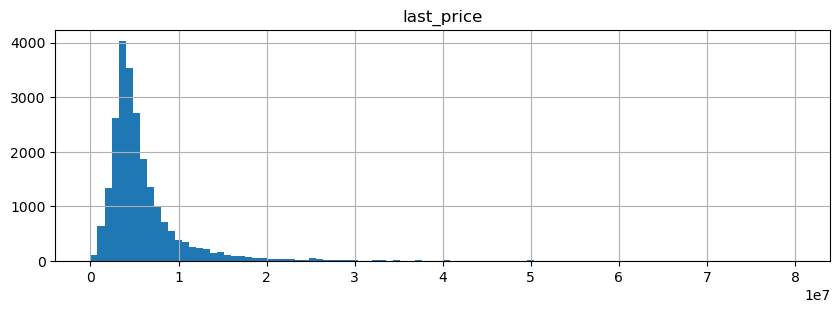

In [64]:
# какой-то маленький минимум на фоне среднего, да и для продажи квартиры
data.hist('last_price', bins=100,figsize=(10,3), range=(0,80000000))

In [65]:
data.query('last_price < 450000')
# после цены 12к минимумом будет 430к

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,amount_of_rooms,amount_of_balconies,floor,floors_total,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_nearest_m,airports_nearest_m,parks_around_3km,park_nearest_m,ponds_around_3km,pond_nearest_m
8793,санкт-петербург,109.0,32.000000,40.50,2.75,2,0,25,25,False,...,7,12190.0,2019-03-20,8.0,9176.0,36421.0,1.0,805.0,0.0,NaN
14911,поселок станции свирь,54.0,31.153846,9.45,2.65,2,0,3,3,False,...,5,430000.0,2018-06-26,44.0,NaN,NaN,0.0,NaN,0.0,NaN
16274,деревня старополье,40.0,23.076923,7.00,2.65,1,0,1,5,False,...,18,440000.0,2018-07-10,45.0,NaN,NaN,0.0,NaN,0.0,NaN
17456,сланцы,30.4,16.000000,6.00,2.65,1,0,1,2,False,...,7,430000.0,2019-04-22,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [66]:
# предполагаю, что цену указали в тысячах(смотря на общую площадь квартиры),
# исправим это, увеличим на 1000
data.loc[:, 'last_price'] = data['last_price'].replace(12190, 12190000)
data['last_price'].min()

430000.0

In [67]:
data.query('last_price > 400000000')
# можно посчитать за выброс, где цена 700М+ 

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,amount_of_rooms,amount_of_balconies,floor,floors_total,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_nearest_m,airports_nearest_m,parks_around_3km,park_nearest_m,ponds_around_3km,pond_nearest_m
12971,санкт-петербург,400.0,250.0,70.0,2.65,7,2,10,10,False,...,19,763000000.0,2017-09-30,33.0,3956.0,25108.0,1.0,530.0,3.0,756.0
14706,санкт-петербург,401.0,204.0,24.0,2.65,5,3,9,9,False,...,15,401300000.0,2016-02-20,393.0,2389.0,21912.0,1.0,545.0,1.0,478.0
19540,санкт-петербург,900.0,409.7,112.0,2.80,12,0,25,25,False,...,8,420000000.0,2017-12-06,106.0,7877.0,30706.0,0.0,NaN,2.0,318.0


In [68]:
# избавимся от нее
data = data.query('last_price < 700000000')
data['last_price'].max()

420000000.0

*займемся числом комнат в квартире (amount_of_rooms)*

In [69]:
# так как пропусков здесь нет, посмотрим на описательную статистику
data['amount_of_rooms'].describe()

count    23440.000000
mean         2.073080
std          1.076609
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: amount_of_rooms, dtype: float64

In [70]:
# кто-то продает квартиру без комнат
data.query('amount_of_rooms == 0')
# а их целых 176

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,amount_of_rooms,amount_of_balconies,floor,floors_total,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_nearest_m,airports_nearest_m,parks_around_3km,park_nearest_m,ponds_around_3km,pond_nearest_m
144,поселок мурино,27.0,15.500000,4.7250,2.65,0,2,2,24,False,...,1,2450000.0,2017-03-30,181.0,NaN,NaN,0.0,NaN,0.0,NaN
349,деревня кудрово,25.0,17.000000,4.3750,2.65,0,0,1,14,False,...,4,2320000.0,2017-09-27,45.0,NaN,NaN,0.0,NaN,0.0,NaN
508,поселок парголово,34.4,24.300000,6.0200,2.65,0,1,19,26,False,...,0,3375000.0,2017-03-28,430.0,19292.0,53115.0,0.0,NaN,1.0,593.0
608,поселок шушары,25.0,14.423077,4.3750,2.65,0,0,7,10,False,...,2,1850000.0,2019-02-20,29.0,NaN,NaN,0.0,NaN,0.0,NaN
697,деревня кудрово,24.1,17.500000,4.2175,2.75,0,0,21,25,False,...,12,2500000.0,2017-12-01,201.0,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,санкт-петербург,26.0,18.000000,4.5500,2.65,0,0,16,25,False,...,7,3200000.0,2017-09-01,14.0,13222.0,11405.0,0.0,NaN,1.0,623.0
23442,поселок мурино,27.7,18.000000,4.8475,2.65,0,2,4,24,False,...,0,2500000.0,2017-09-28,4.0,NaN,NaN,0.0,NaN,0.0,NaN
23554,санкт-петербург,26.0,15.000000,4.5500,2.65,0,0,8,19,False,...,15,3350000.0,2018-09-07,31.0,17092.0,18090.0,0.0,NaN,2.0,112.0
23592,никольское,29.0,18.000000,5.0750,2.65,0,2,8,9,False,...,10,1450000.0,2017-11-11,82.0,NaN,NaN,0.0,NaN,0.0,NaN


In [71]:
# может быть есть те, кто квартиру-студию не считает за комнату
data.query('amount_of_rooms == 0 and is_studio == True')

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,amount_of_rooms,amount_of_balconies,floor,floors_total,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_nearest_m,airports_nearest_m,parks_around_3km,park_nearest_m,ponds_around_3km,pond_nearest_m
144,поселок мурино,27.0,15.500000,4.7250,2.65,0,2,2,24,False,...,1,2450000.0,2017-03-30,181.0,NaN,NaN,0.0,NaN,0.0,NaN
608,поселок шушары,25.0,14.423077,4.3750,2.65,0,0,7,10,False,...,2,1850000.0,2019-02-20,29.0,NaN,NaN,0.0,NaN,0.0,NaN
697,деревня кудрово,24.1,17.500000,4.2175,2.75,0,0,21,25,False,...,12,2500000.0,2017-12-01,201.0,NaN,NaN,0.0,NaN,0.0,NaN
716,поселок шушары,17.0,12.000000,2.9750,2.70,0,0,1,9,False,...,5,1500000.0,2017-06-07,40.0,29846.0,18654.0,0.0,NaN,0.0,NaN
1173,санкт-петербург,29.0,17.000000,5.0750,2.65,0,2,2,24,False,...,12,3240000.0,2018-10-30,13.0,16293.0,35129.0,0.0,NaN,1.0,475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,санкт-петербург,30.0,18.200000,5.2500,2.65,0,0,5,25,False,...,8,3090000.0,2017-12-17,211.0,16414.0,35250.0,0.0,NaN,1.0,400.0
22877,санкт-петербург,28.0,18.000000,4.9000,2.70,0,0,10,19,False,...,2,4280000.0,2017-10-26,151.0,7206.0,18982.0,0.0,NaN,1.0,415.0
23210,санкт-петербург,26.0,18.000000,4.5500,2.65,0,0,16,25,False,...,7,3200000.0,2017-09-01,14.0,13222.0,11405.0,0.0,NaN,1.0,623.0
23554,санкт-петербург,26.0,15.000000,4.5500,2.65,0,0,8,19,False,...,15,3350000.0,2018-09-07,31.0,17092.0,18090.0,0.0,NaN,2.0,112.0


In [72]:
# заменим тогда в таких данных количество комнат на 1
data.loc[(data['amount_of_rooms'] == 0) & (data['is_studio'] == True), 
         'amount_of_rooms'] = 1

In [73]:
# также посмотрим, может кто свободную планировку не посчитал за комнату
data.query('amount_of_rooms == 0 and is_open_plan == True')
# как раз оставшиеся квартиры

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,amount_of_rooms,amount_of_balconies,floor,floors_total,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_nearest_m,airports_nearest_m,parks_around_3km,park_nearest_m,ponds_around_3km,pond_nearest_m
349,деревня кудрово,25.00,17.000000,4.37500,2.65,0,0,1,14,False,...,4,2320000.0,2017-09-27,45.0,NaN,NaN,0.0,NaN,0.0,NaN
508,поселок парголово,34.40,24.300000,6.02000,2.65,0,1,19,26,False,...,0,3375000.0,2017-03-28,430.0,19292.0,53115.0,0.0,NaN,1.0,593.0
780,поселок мурино,26.10,15.057692,4.56750,2.65,0,1,8,18,False,...,9,2600000.0,2018-02-20,45.0,NaN,NaN,0.0,NaN,0.0,NaN
839,поселок новый свет,35.00,15.000000,6.12500,2.70,0,1,3,5,False,...,14,1900000.0,2017-04-14,7.0,NaN,NaN,0.0,NaN,0.0,NaN
946,поселок мурино,23.00,18.000000,4.02500,2.65,0,2,7,27,False,...,5,2200000.0,2016-09-27,483.0,NaN,NaN,0.0,NaN,0.0,NaN
1574,деревня кудрово,22.00,15.000000,3.85000,2.65,0,1,16,18,False,...,0,2200000.0,2017-11-03,81.0,NaN,NaN,0.0,NaN,0.0,NaN
1625,поселок станции корнево,23.98,10.500000,4.19650,2.65,0,1,3,4,False,...,7,1980000.0,2018-02-01,120.0,NaN,NaN,0.0,NaN,0.0,NaN
2532,санкт-петербург,27.10,18.700000,4.74250,2.65,0,2,9,18,False,...,5,3500000.0,2018-02-01,70.0,8175.0,32036.0,0.0,NaN,1.0,644.0
3019,сертолово,24.00,18.000000,4.20000,2.65,0,2,6,10,False,...,18,2100000.0,2017-11-10,5.0,NaN,NaN,0.0,NaN,0.0,NaN
4115,санкт-петербург,24.00,18.000000,4.20000,2.65,0,2,4,25,False,...,7,2600000.0,2018-02-01,42.0,13330.0,10031.0,1.0,915.0,0.0,NaN


In [74]:
# заменим и в этих данных количество комнат на 1
data.loc[(data['amount_of_rooms'] == 0) & (data['is_open_plan'] == True), 
         'amount_of_rooms'] = 1

In [75]:
# глянем, остались ли у нас квартиры без комнат
len(data.query('amount_of_rooms == 0'))

0

*займемся числом фотографий квартиры (total_images)*

In [76]:
# так как пропусков здесь нет, посмотрим на описательную статистику
data['total_images'].describe()

count    23440.000000
mean         9.882338
std          5.680417
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

In [77]:
# есть объявления без фотографий, узнаем сколько их
len(data.query('total_images == 0'))
# непонятно, что с такими делать, но трогать не буду

1042

In [78]:
# снова проверим на наличие дубликатов
data.duplicated().sum()

0

In [79]:
data.head()

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,amount_of_rooms,amount_of_balconies,floor,floors_total,is_apartment,...,total_images,last_price,first_day_exposition,days_exposition,city_center_nearest_m,airports_nearest_m,parks_around_3km,park_nearest_m,ponds_around_3km,pond_nearest_m
0,санкт-петербург,108.0,51.000000,25.000,2.70,3,0,8,16,False,...,20,13000000.0,2019-03-07,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0
1,поселок шушары,40.4,18.600000,11.000,2.65,1,2,1,11,False,...,7,3350000.0,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN
2,санкт-петербург,56.0,34.300000,8.300,2.65,2,0,4,5,False,...,10,5196000.0,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0
3,санкт-петербург,159.0,91.730769,27.825,2.65,3,0,9,14,False,...,0,64900000.0,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0
4,санкт-петербург,100.0,32.000000,41.000,3.03,2,0,13,14,False,...,2,10000000.0,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23440 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   locality_name          23440 non-null  object        
 1   total_area_m2          23440 non-null  float64       
 2   living_area_m2         23440 non-null  float64       
 3   kitchen_area_m2        23440 non-null  float64       
 4   ceiling_height_m       23440 non-null  float64       
 5   amount_of_rooms        23440 non-null  int64         
 6   amount_of_balconies    23440 non-null  int32         
 7   floor                  23440 non-null  int64         
 8   floors_total           23440 non-null  int32         
 9   is_apartment           23440 non-null  bool          
 10  is_studio              23440 non-null  bool          
 11  is_open_plan           23440 non-null  bool          
 12  total_images           23440 non-null  int64         
 13  last_p

**Вывод по 1 шагу:** 

Мы разобрались с предобработкой данных. Теперь мы знаем, что у нас датафрейм содержит объявления по продаже квартир в СПб и в соседних населённых пунктах, и объявления были опубликованы с ноября 2014 года по май 2019 года. 

Мы изучили наши столбцы (подправили их названия и их порядок), заполнили пропуски, исправили у некоторых столбцов их тип данных, также логически исправили подозрительные данные и убрали артефакты.

## шаг. Посчитать и добавить в таблицу

__1) цена квадратного метра__

In [81]:
data['price_per_sq_meter'] = data['last_price']/data['total_area_m2']
data['price_per_sq_meter'] = data['price_per_sq_meter'].round(decimals=2)
data['price_per_sq_meter'].describe()
# странно, максимум составляет 1.7млн.руб. за квадратный метр, многовато

count    2.344000e+04
mean     9.922768e+04
std      4.874718e+04
min      7.962960e+03
25%      7.655382e+04
50%      9.493671e+04
75%      1.141201e+05
max      1.736842e+06
Name: price_per_sq_meter, dtype: float64

__2) день недели, месяц и год публикации объявления__

In [82]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data[['first_day_exposition', 'weekday', 'month', 'year']].head()

,first_day_exposition,weekday,month,year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


__3) этаж квартиры (первый, последний, другой)__

In [83]:
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(categorize_floor, axis=1)
data['floor_type'].value_counts()

floor_type
другой       17240
последний     3307
первый        2893
Name: count, dtype: int64

__4) соотношение жилой и общей площади, а также отношение площади кухни к общей__

In [84]:
data['living_area_ratio'] = data['living_area_m2'] / data['total_area_m2']
data['kitchen_area_ratio'] = data['kitchen_area_m2'] / data['total_area_m2']
data[['living_area_ratio', 'kitchen_area_ratio']].head()

,living_area_ratio,kitchen_area_ratio
0,0.472222,0.231481
1,0.460396,0.272277
2,0.612500,0.148214
3,0.576923,0.175000
4,0.320000,0.410000


In [85]:
data.sample(5)

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,amount_of_rooms,amount_of_balconies,floor,floors_total,is_apartment,...,park_nearest_m,ponds_around_3km,pond_nearest_m,price_per_sq_meter,weekday,month,year,floor_type,living_area_ratio,kitchen_area_ratio
22090,деревня кудрово,63.0,36.346154,11.025,2.65,2,0,18,20,False,...,NaN,0.0,NaN,85714.29,2,2,2018,другой,0.576923,0.175000
20468,санкт-петербург,77.0,45.000000,10.500,2.60,3,2,4,14,False,...,NaN,1.0,492.0,168831.17,3,2,2018,другой,0.584416,0.136364
10199,санкт-петербург,49.0,37.100000,5.200,2.60,4,0,4,5,False,...,437.0,2.0,789.0,77551.02,3,12,2017,другой,0.757143,0.106122
10731,санкт-петербург,42.2,26.700000,6.000,2.60,2,1,3,5,False,...,315.0,1.0,615.0,85308.06,2,12,2017,другой,0.632701,0.142180
18416,санкт-петербург,33.8,18.400000,8.200,2.65,1,0,3,9,False,...,NaN,0.0,NaN,107988.17,0,11,2016,другой,0.544379,0.242604


**Вывод по 2 шагу:** 


Мы посчитали необходимые данные по заданию и добавили столбцы к нашему датафрейму. 

Сначала мы рассчитали цену квадратного метра, затем извлекли день недели, 
месяц и год из даты публикации; потом мы классифицировали этаж квартиры и 
рассчитали соотношения жилой и кухонной площади к общей.

## шаг. Провести исследовательский анализ данных

In [86]:
# напишем сразу функцию для упрощения создания гистограмм
def plot_hist(data, xname, yname, title, range=None):
    plt.figure(figsize=(9,6))
    if range:
        data.hist(bins=100, range=range)
    else:
        data.hist(bins=100)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title(title)
    plt.ticklabel_format(style='plain')
    plt.show()

**1) Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.**

In [87]:
# рассмотрим сначала площадь
data['total_area_m2'].describe()

count    23440.000000
mean        60.367623
std         35.600526
min         13.000000
25%         40.000000
50%         52.000000
75%         69.762500
max        900.000000
Name: total_area_m2, dtype: float64

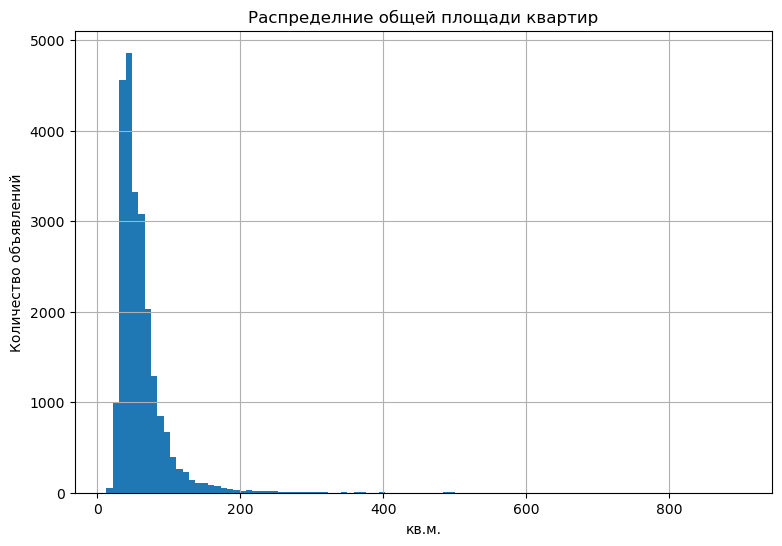

In [88]:
plot_hist(data.total_area_m2, 'кв.м.', 'Количество объявлений', 'Распределние общей площади квартир')

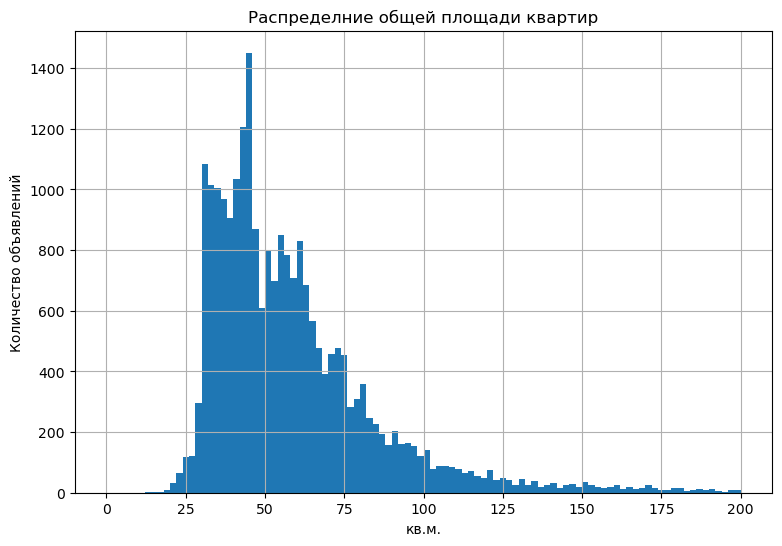

In [89]:
# по гистаграмме видим, что большинство квартир имеют площадь около 40-60 кв.м. 
# рассмотрим поближе
plot_hist(data.total_area_m2, 'кв.м.', 'Количество объявлений', 'Распределние общей площади квартир', range=(0,200))

Распределение общей площади квартир вышло вплоне ожидаемо, видим нагляднее, что больше 1400 квартир имеют площадь 40 кв.м. (на что и указывал наш первый квартиль). Также видим, что большинство квартир имеют площадь от 30 до 90 кв.м.

In [90]:
# теперь рассмотрим цену
# выполним форматирование чисел
summary = data['last_price'].describe()

# форматируем каждое значение
formatted_summary = {
    'count': f"{summary['count']:,.2f}",
    'mean': f"{summary['mean']:,.2f}",
    'std': f"{summary['std']:,.2f}",
    'min': f"{summary['min']:,.2f}",
    '25%': f"{summary['25%']:,.2f}",
    '50%': f"{summary['50%']:,.2f}",
    '75%': f"{summary['75%']:,.2f}",
    'max': f"{summary['max']:,.2f}"
}

for stat, value in formatted_summary.items():
    print(f"{stat}: {value}")

count: 23,440.00
mean: 6,505,032.03
std: 9,698,813.92
min: 430,000.00
25%: 3,420,000.00
50%: 4,650,000.00
75%: 6,799,000.00
max: 420,000,000.00


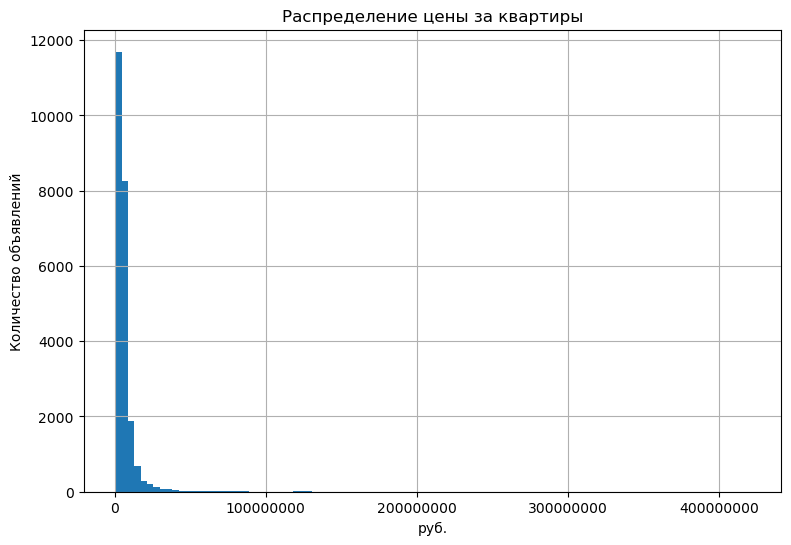

In [91]:
plot_hist(data.last_price, 'руб.', 'Количество объявлений', 'Распределение цены за квартиры')

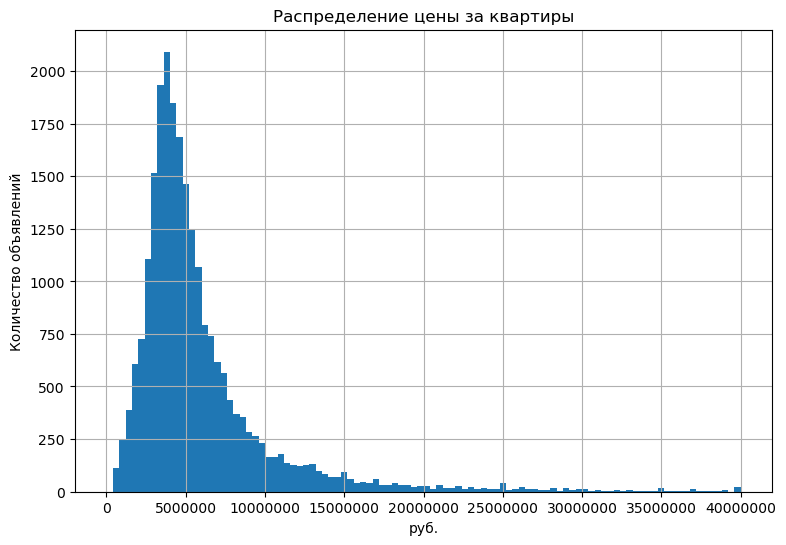

In [92]:
# плохо видно из-за выбросов, рассмотрим поближе
plot_hist(data.last_price, 'руб.', 'Количество объявлений', 'Распределение цены за квартиры', range=(0,40000000))

Как и следовало, видим данные как в описательной статистике. Больше 2000 объявлений имеют цену ~3.5млн.руб. Объявления, имеющие больше 25млн.руб., составляют 1-2% от всех данных. А где цена больше 40млн.руб., имеют меньше 1%.
Видим, что большинство объявлений продаются от 3млн.руб. до 7млн.руб. 

In [93]:
# рассмотрим число комнат в квартирах
data['amount_of_rooms'].describe()

count    23440.000000
mean         2.080589
std          1.065554
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: amount_of_rooms, dtype: float64

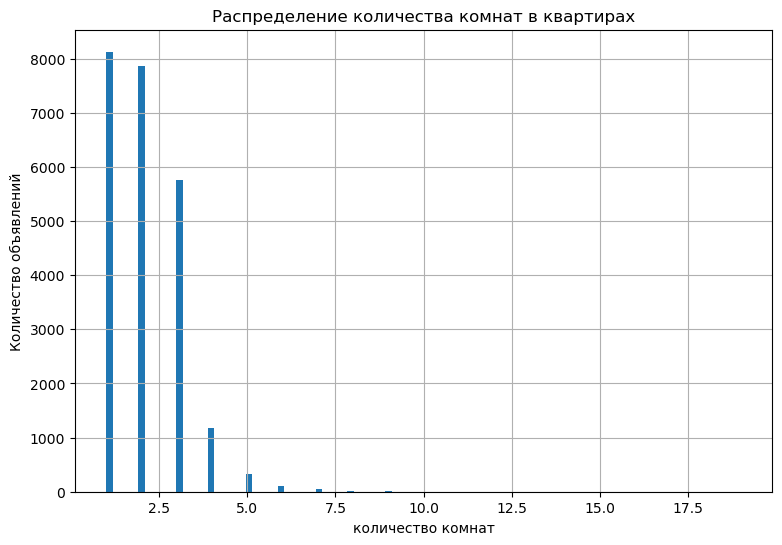

In [94]:
plot_hist(data.amount_of_rooms, 'количество комнат', 'Количество объявлений', 'Распределение количества комнат в квартирах')

И так наглядно видно, что большинство квартир имеют 1 или 2 комнаты. Больше 6 комнат в квартире составляют меньше 1% от всех объявлений.

In [95]:
# рассмотрим теперь высоту потолков в квартирах
data['ceiling_height_m'].describe()

count    23440.000000
mean         2.696737
std          0.214505
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height_m, dtype: float64

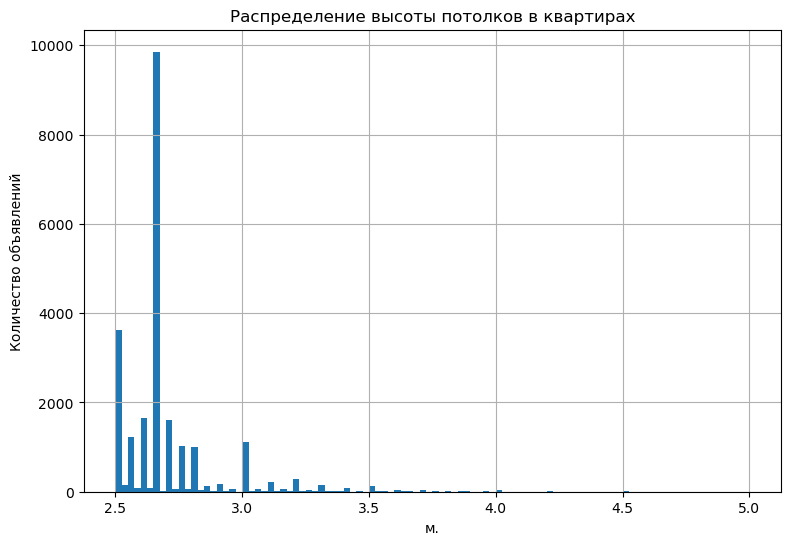

In [96]:
plot_hist(data.ceiling_height_m, 'м.', 'Количество объявлений', 'Распределение высоты потолков в квартирах')

Видим, что высота потолков больше 3м бывает у 1% объявлений (считаю за выбросы). А у почти 10к квартир высота потолков составляет ~2.7м.

**2) Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**

In [97]:
# рассмотрим время продажи квартиры
# для начала уберем из данных квартиры, которые еще не продали
sold = data[~data.days_exposition.isna()]
sold['days_exposition'].describe()

count    20282.000000
mean       180.990879
std        219.960697
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

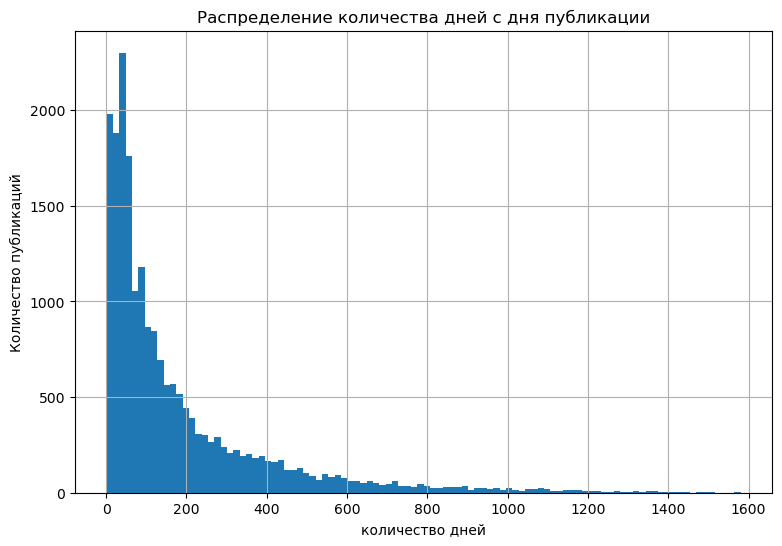

In [98]:
# построим гистограмму по нашей функции
plot_hist(sold.days_exposition, 'количество дней', 'Количество публикаций', 'Распределение количества дней с дня публикации')

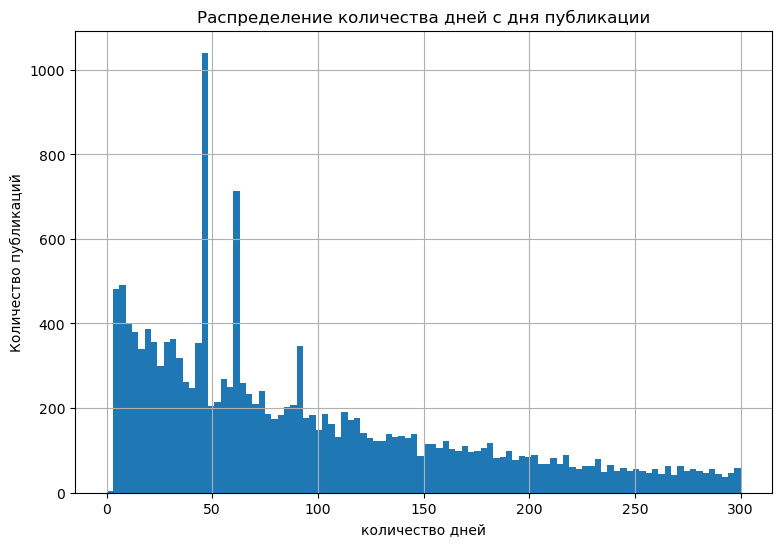

In [99]:
# рассмотрим более детально основную часть нашего распределения 
plot_hist(sold.days_exposition, 'количество дней', 'Количество публикаций', 'Распределение количества дней с дня публикации', range=(0,300))

In [100]:
# группируем по годам для вычисления медианы и среднего
median_days = sold.groupby('year')['days_exposition'].median()
mean_days = sold.groupby('year')['days_exposition'].mean()

Text(0.5, 1.0, 'По медиане')

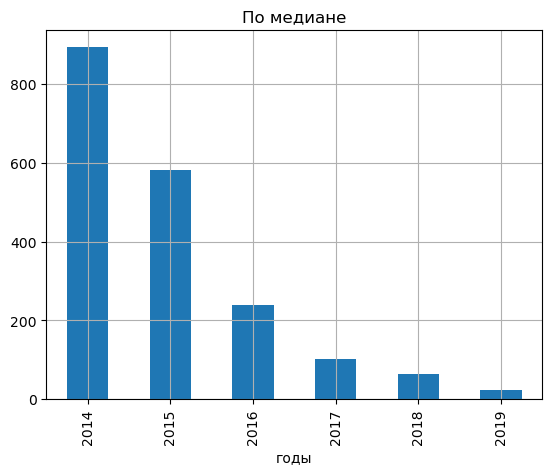

In [101]:
# посмотрим наглядно, как менялось медианное значение по годам
median_days.plot(y='days_exposition', kind='bar', grid=True)
plt.xlabel('годы')
plt.title('По медиане')

Text(0.5, 1.0, 'По средней')

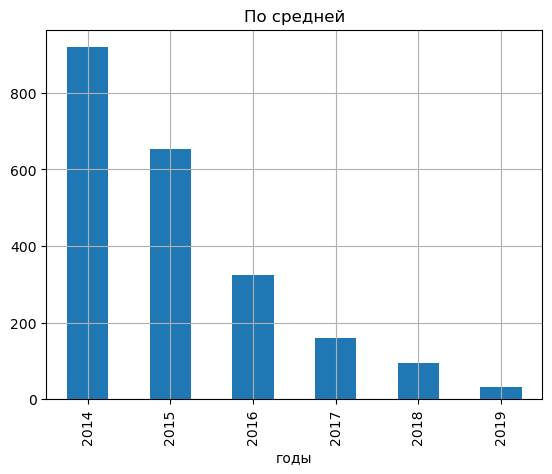

In [102]:
# посмотрим наглядно, как менялось среднее значение по годам
mean_days.plot(y='days_exposition', kind='bar', grid=True)
plt.xlabel('годы')
plt.title('По средней')

Из нашей гистограммы "Распределение количества дней с дня публикации" мы видим, что обычно продажа занимает 95 дней (не считая выбросы).

Также мы расмотрели, как отличается продажа в зависимости от года публикации объявления. По этим данным можно сказать, что дольше всего продавались квартиры, которые были выставлены в 2014 году (средняя и медиана составляют ~900 дней), а объявления опубликованные в 2019 году продавались в течение 1-2 месяцев.

**3) Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружили.**

Ранее мы убрали редкие и выбивающиеся значения, такие как:
1) высота потолков 100м и 5.5м
2) расстояние до аэропорта 0м
3) 60 этажное жилое здание в СПб (таких нет)

Но вспомним, было странно, что квадратный метр стоил 1.7млн.руб.

In [103]:
summary = data['price_per_sq_meter'].describe()
# форматируем каждое значение
formatted_summary = {
    'count': f"{summary['count']:,.2f}",
    'mean': f"{summary['mean']:,.2f}",
    'std': f"{summary['std']:,.2f}",
    'min': f"{summary['min']:,.2f}",
    '25%': f"{summary['25%']:,.2f}",
    '50%': f"{summary['50%']:,.2f}",
    '75%': f"{summary['75%']:,.2f}",
    'max': f"{summary['max']:,.2f}"
}

for stat, value in formatted_summary.items():
    print(f"{stat}: {value}")

count: 23,440.00
mean: 99,227.68
std: 48,747.18
min: 7,962.96
25%: 76,553.82
50%: 94,936.71
75%: 114,120.10
max: 1,736,842.11


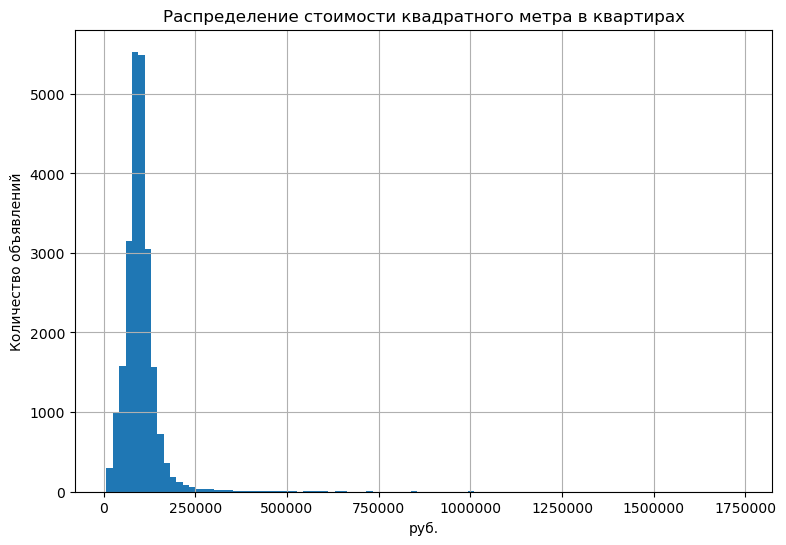

In [104]:
# рассмотрим нагляднее на гистограмме
plot_hist(data.price_per_sq_meter, 'руб.','Количество объявлений','Распределение стоимости квадратного метра в квартирах')

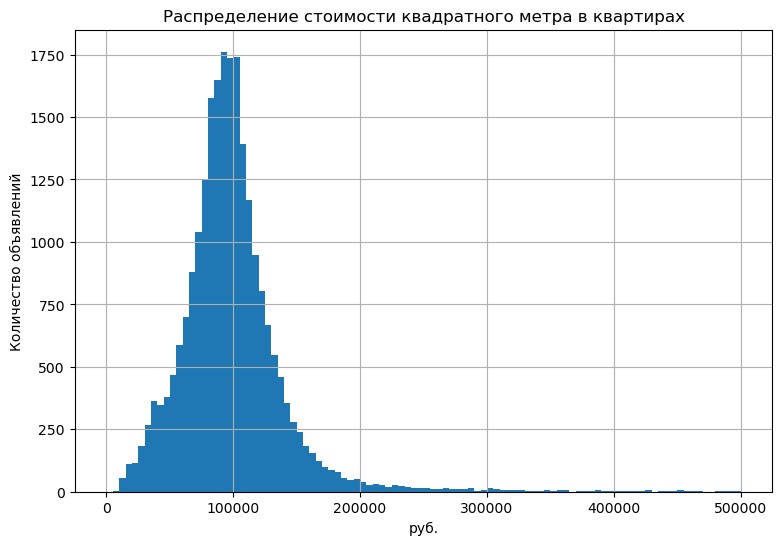

In [105]:
# рассмотрим детальнее основную часть нашего распределения
plot_hist(data.price_per_sq_meter, 'руб.','Количество объявлений','Распределение стоимости квадратного метра в квартирах', range=(0,500000))

Мы видим, что в среднем цена за кв.м. варьируется от 70к до 120к рублей. Цены более 400к рублей за кв.м. составляют меньше 1% от всех объявлений.

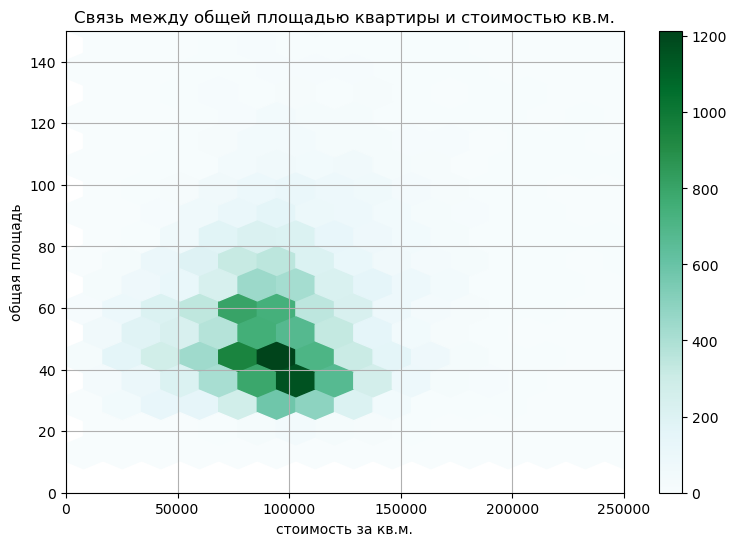

Линейная корреляция между общей площадью и стоимостью кв.м.: 0.297


In [106]:
# построим диаграмму взаимного распределения общей площади и стоимости кв.м.
data.plot(y='total_area_m2', x='price_per_sq_meter', kind='hexbin', 
          figsize=(9,6), gridsize=100, grid=True, sharex=False)
plt.ticklabel_format(style='plain')
plt.xlim(0,250000)
plt.ylim(0,150)
plt.ylabel('общая площадь')
plt.xlabel('стоимость за кв.м.')
plt.title('Связь между общей площадью квартиры и стоимостью кв.м.')
plt.show()
print(f'Линейная корреляция между общей площадью и стоимостью кв.м.: {data.total_area_m2.corr(data.price_per_sq_meter):.3f}')

Линейная связь слабая, хотя на графике видно скопление ячеек и отдельно выбивающие объекты. Возможно дело как раз в выбивающихся значениях.

In [107]:
# посмотрим, как много у нас объявлений со стоимостью за кв.м. больше 600к и
# с общей площадью меньше чем 40 кв.м.
data.query('price_per_sq_meter >= 600000 and total_area_m2 < 40')

,locality_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,amount_of_rooms,amount_of_balconies,floor,floors_total,is_apartment,...,park_nearest_m,ponds_around_3km,pond_nearest_m,price_per_sq_meter,weekday,month,year,floor_type,living_area_ratio,kitchen_area_ratio
4859,санкт-петербург,33.00,19.038462,5.775,3.50,1,0,2,5,False,...,344.0,3.0,119.0,848484.85,0,4,2019,другой,0.576923,0.175000
17172,санкт-петербург,33.00,19.038462,5.775,3.50,1,0,2,5,False,...,342.0,3.0,27.0,848484.85,1,4,2019,другой,0.576923,0.175000
21238,всеволожск,38.12,16.830000,10.700,2.65,1,1,4,10,False,...,NaN,0.0,NaN,640422.35,2,6,2018,другой,0.441501,0.280693
22869,санкт-петербург,25.00,14.000000,11.000,2.65,1,5,5,5,True,...,223.0,3.0,30.0,600000.00,2,7,2018,последний,0.560000,0.440000


In [108]:
# выглядит как-то подозрительно, лучше уберем их
data = data.query('price_per_sq_meter <= 600000 and total_area_m2 > 40')

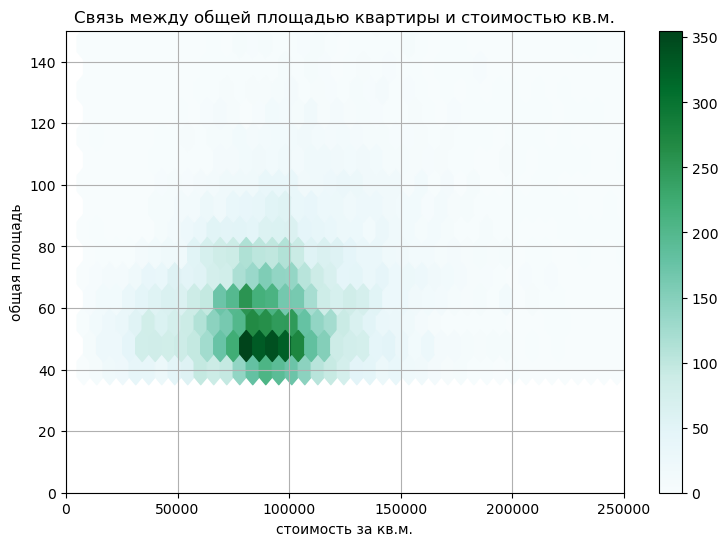

Линейная корреляция между общей площадью и стоимостью кв.м.: 0.340


In [109]:
# посмотрим теперь на диаграмму взаимного распределения
data.plot(y='total_area_m2', x='price_per_sq_meter', kind='hexbin', 
          figsize=(9,6), gridsize=100, grid=True, sharex=False)
plt.ticklabel_format(style='plain')
plt.xlim(0,250000)
plt.ylim(0,150)
plt.ylabel('общая площадь')
plt.xlabel('стоимость за кв.м.')
plt.title('Связь между общей площадью квартиры и стоимостью кв.м.')
plt.show()
print(f'Линейная корреляция между общей площадью и стоимостью кв.м.: {data.total_area_m2.corr(data.price_per_sq_meter):.3f}')

График стал более детален, а главное линейная связь стало немного сильнее, хотя мы убрали пару выбивающихся строк.

**4) Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.**

In [110]:
# создадим функцию, которая будет демонстрировать нам влияние различных 
# факторов на стоимость квартиры, а также выводить график
def price_relation_with(data, row, xname, title):
    df = data.pivot_table(index=row, values='last_price', aggfunc='median')
    display(df)
    df.plot(xticks=df.index)
    plt.ylabel('цена, руб.')
    plt.xlabel(xname)
    plt.title(title)
    plt.ticklabel_format(style='plain')
    plt.show()

,last_price
total_area_m2,
40.10,4090000.0
40.11,4435000.0
40.12,4200000.0
40.19,3886000.0
40.20,3599500.0
...,...
590.00,65000000.0
618.00,300000000.0
631.00,140000000.0


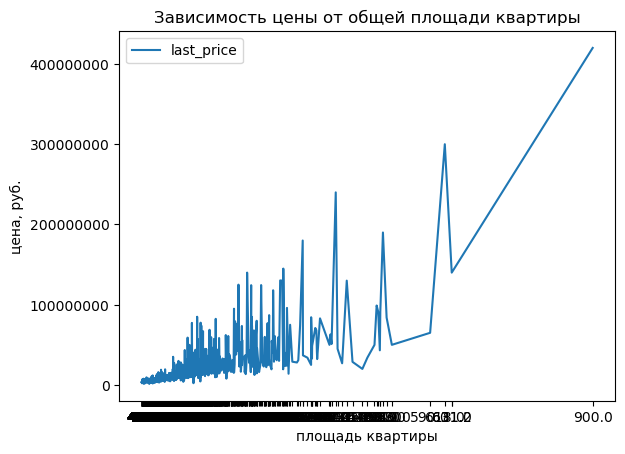

In [111]:
# с площадью
price_relation_with(data, 'total_area_m2', 'площадь квартиры', 'Зависимость цены от общей площади квартиры')

Видим, как с увеличением площади увеличивается и цена за квартиру.

,last_price
amount_of_rooms,
1,4600000.0
2,4800000.0
3,6200000.0
4,9000000.0
5,14000000.0
6,19000000.0
7,24900000.0
8,22190000.0
9,23750000.0


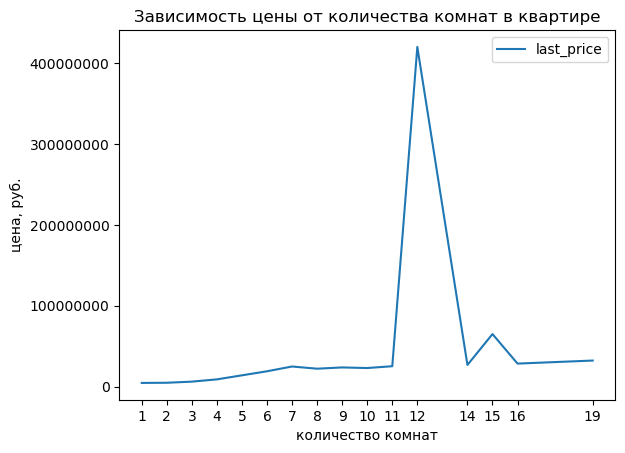

In [112]:
# с количеством комнат
price_relation_with(data, 'amount_of_rooms', 'количество комнат', 'Зависимость цены от количества комнат в квартире')

Не так явно, но такое и с количеством комнат, также виден пик на 12 комнатах (видимо, это одна-две квартиры, возможно у них еще есть плюсы, кроме количества комнат, за что такая и цена).

,last_price
city_center_nearest_m,
181.0,31099000.0
215.0,10990000.0
287.0,9590000.0
291.0,11500000.0
318.0,46424072.0
...,...
64857.0,3650000.0
65105.0,3300000.0
65764.0,4000000.0


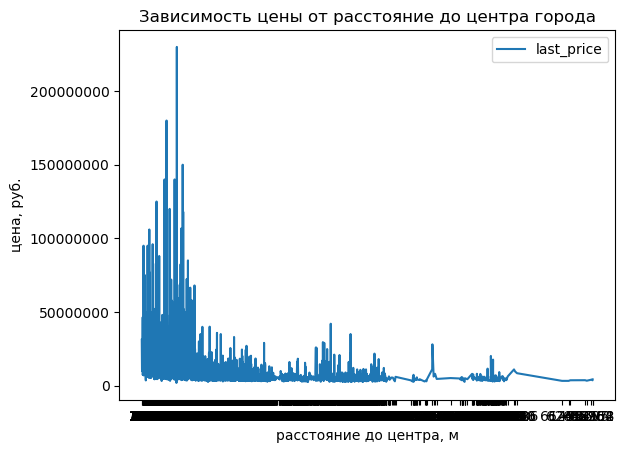

In [113]:
# с удаленностью от центра
price_relation_with(data, 'city_center_nearest_m', 'расстояние до центра, м', 'Зависимость цены от расстояние до центра города')

На гистограмме видно, что зависимость от близкого нахождения квартиры к центру города приводит к большей цене.

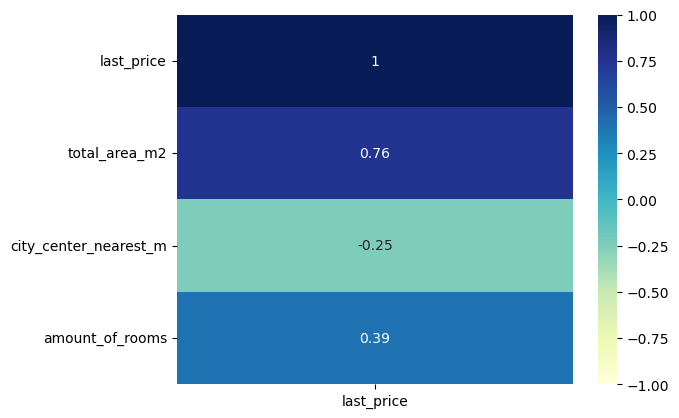

In [114]:
# посмотрим на матрицу корреляции
# вычислим корреляционную матрицу
corr_matrix = data[['last_price','total_area_m2','city_center_nearest_m','amount_of_rooms']].corr()

# построим тепловую карту только для столбца 'last_price'
sns.heatmap(corr_matrix[['last_price']], vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
plt.show()

Сильная корреляция наблюдается между ценой и общей площадью. А между количеством комнат и ценой связь почти средняя. В то время как между расстоянием до центра города и ценой имеется слабая отрицательная корреляция.

Text(0.5, 1.0, 'Зависимость цены от этажа квартиры')

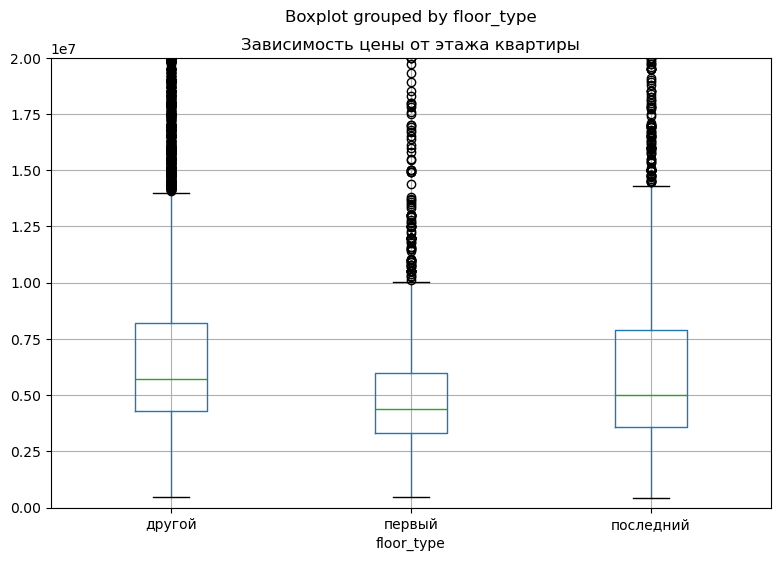

In [115]:
# с этажностью
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').reset_index()
data.boxplot('last_price', by='floor_type', figsize=(9,6)). set_ylim(0,20000000)
plt.title('Зависимость цены от этажа квартиры')

Стоимость квартир на первых этажах ниже.

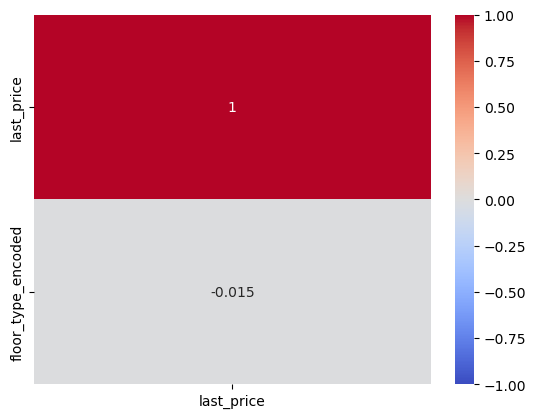

In [116]:
# посмотрим на матрицу корреляции для типа этажа и цены
# у нас данные в floor_type не числовые, поэтому преобразуем их для начала

# создадим экземпляр LabelEncoder
le = LabelEncoder()
# преобразуем категориальные данные во временную переменную
floor_type_encoded = le.fit_transform(data['floor_type'])
# создадим временный DF для расчета корреляции
temp_data = pd.DataFrame({
    'last_price': data['last_price'],
    'floor_type_encoded': floor_type_encoded
})

# теперь вычислим корреляционную матрицу
corr_matrix = temp_data.corr()
# построим тепловую карту для столбца 'last_price'
sns.heatmap(corr_matrix[['last_price']], vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

Между типом этажа и ценой очень слабая отрицательная корреляция.

,last_price
weekday,
0,5400000.0
1,5500000.0
2,5500000.0
3,5500000.0
4,5370000.0
5,5350000.0
6,5300000.0


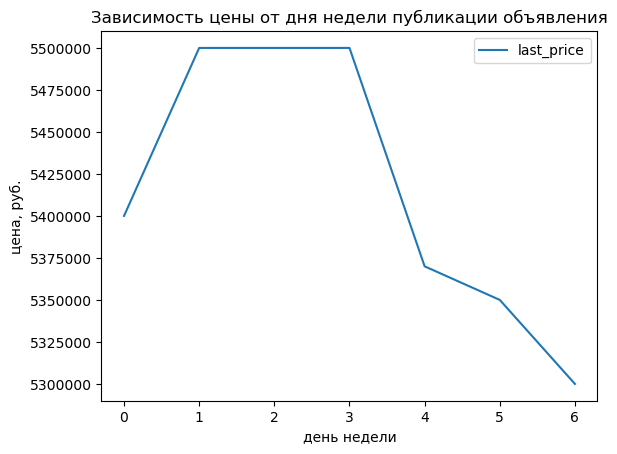

In [117]:
# день недели
price_relation_with(data, 'weekday', 'день недели', 'Зависимость цены от дня недели публикации объявления')

Стоимость квартир, размещенных в середине недели (вторник-четверг), более высокая.

,last_price
month,
1,5500000.0
2,5450000.0
3,5400000.0
4,5430785.0
5,5425000.0
6,5200000.0
7,5490000.0
8,5465000.0
9,5500000.0


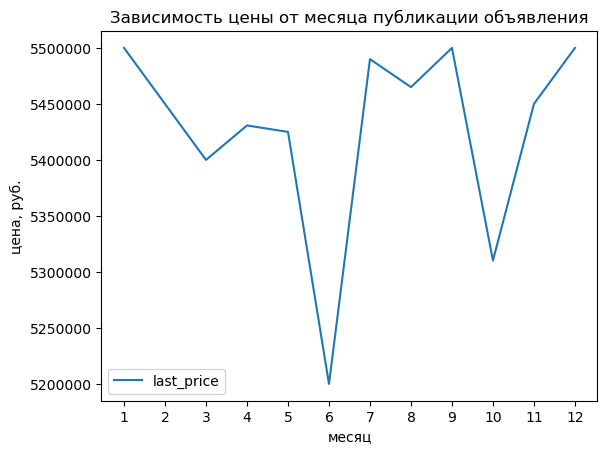

In [118]:
# месяц
price_relation_with(data, 'month', 'месяц', 'Зависимость цены от месяца публикации объявления')

На цену влияет сезонность в течение года - с мая по июнь происходит спад цен, затем резкий взлет к концу лета. Максимум достигался в сентябре.

,last_price
year,
2014,8542628.0
2015,5950000.0
2016,5300000.0
2017,5300000.0
2018,5325000.0
2019,5800000.0


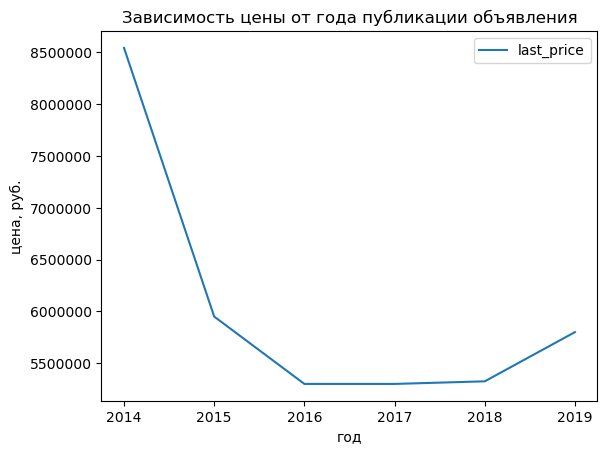

In [119]:
# год
price_relation_with(data, 'year', 'год', 'Зависимость цены от года публикации объявления')

Как видно на гистограмме, стоимость резко падала до 2016 года, и цена стояла 2 года, и только в 2018 году начался рост.

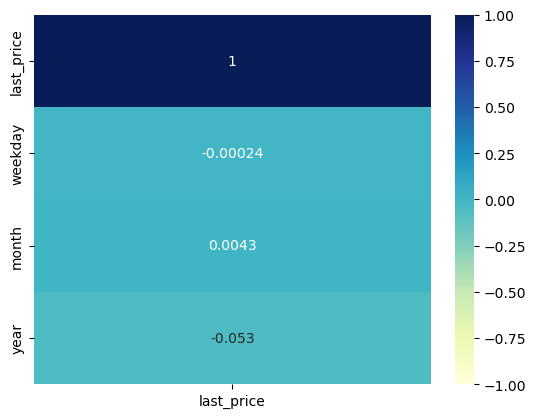

In [120]:
# посмотрим на матрицу корреляции
# вычислим корреляционную матрицу
corr_matrix = data[['last_price','weekday','month','year']].corr()

# построим тепловую карту только для столбца 'last_price'
sns.heatmap(corr_matrix[['last_price']], vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
plt.show()

Смотря на нашу тепловую карту, видим, что либо связь очень слабая, либо её вообще нет.

*По нашим расчетам больше всего влияние на стоимость квартиры имеет общая площадь. Она имеет тесную линейную взаимосвязь почти 0.8.*

**5) Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить среди них населённые пункты с самой высокой и низкой стоимостью жилья.**

In [121]:
# получаем серию с 10 населенными пунктами с наибольшим числом объявлений
top_10 = data.locality_name.value_counts().head(10)
top_10

locality_name
санкт-петербург      12130
поселок шушары         324
всеволожск             297
пушкин                 278
колпино                246
поселок мурино         229
гатчина                219
поселок парголово      200
выборг                 173
сестрорецк             149
Name: count, dtype: int64

In [122]:
# извлекаем названия(индексы)
top_10_names = top_10.index
# собираем данные по нашим названиям в переменную
top_10 = data.query('locality_name in @top_10_names')

In [123]:
# группируем данные по названию н.п. и вычисляем среднее
top_10_grouped = top_10.groupby('locality_name')['price_per_sq_meter'].mean()
top_10_grouped.sort_values(ascending=False)

locality_name
санкт-петербург      113972.880888
пушкин               102896.556655
сестрорецк           100436.358322
поселок парголово     84521.428700
поселок мурино        77833.393668
поселок шушары        74966.791049
колпино               72177.259024
гатчина               67801.070274
всеволожск            66178.175724
выборг                57417.939480
Name: price_per_sq_meter, dtype: float64

*Интересно получилось, что по количеству в меньшенстве находится Сестрорецк, а среди дороговизны кв.м. уже на 3 месте.*

*И как мы видим по нашей второй таблице, что самая высокая стоимость жилья в Санкт-Петербурге (как и по количеству), а самая низкая стоимость в Выборге (меньше чем в СПб почти в два раза).*

**6) Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге ('locality_name'). Задача — выяснить, какая область входит в центр. Создать столбец с расстоянием до центра в километрах: округлить до целых значений. После этого посчитать среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется — это и будет центральная зона.**

In [124]:
# сделаем срез по квартирам в СПб
spb = data.query('locality_name == "санкт-петербург"')
len(spb)

12130

In [125]:
# посмотрим, сколько у нас значений без пропусков расстояния до центра города
len(spb.query('city_center_nearest_m >= 0'))

12081

In [126]:
# пропусков немного, сделаем снова срез уже без пропусков
spb = spb.query('city_center_nearest_m >= 0')

In [127]:
# создадим столбец в нашем срезе с расстоянием до центра в км, округлим
spb.loc[:, 'km_to_center'] = (spb['city_center_nearest_m'] /1000).round()
spb['km_to_center'].head()

0    16.0
2    14.0
3     7.0
4     8.0
7    12.0
Name: km_to_center, dtype: float64

In [128]:
# посчитаем цену для каждого километра
spb.loc[:, 'price_per_km_to_center'] = spb['last_price'] / spb['km_to_center']
spb['price_per_km_to_center'].head()

0    8.125000e+05
2    3.711429e+05
3    9.271429e+06
4    1.250000e+06
7    6.595833e+05
Name: price_per_km_to_center, dtype: float64

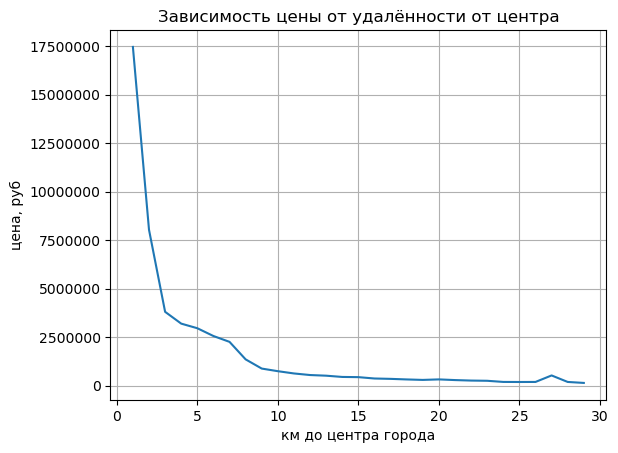

In [129]:
# посчитаем среднюю цену
price_mean_to_center = spb.groupby('km_to_center')['price_per_km_to_center'].mean()
# построим график
price_mean_to_center.plot(grid=True)
plt.title('Зависимость цены от удалённости от центра')
plt.xlabel('км до центра города')
plt.ylabel('цена, руб')
plt.ticklabel_format(style='plain')
plt.show()

Как видно по графику, чем дальше квартира от центра города, тем она дешевле в цене. Центральная зона на графике в районе 5-6 км от центра города.

**7) Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы. Отличаются ли они от общих выводов по всему городу?**

In [130]:
# как мы определили - цент в районе 6км, сделаем по нему срез
spb_center = spb.query('km_to_center <=6').reset_index(drop=True)
len(spb_center)

2853

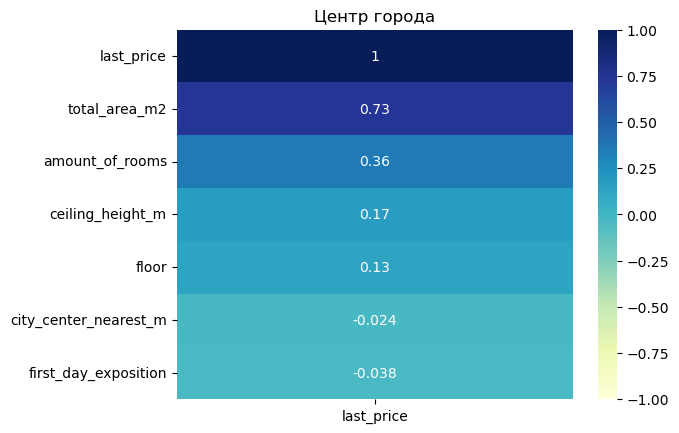

In [131]:
# вычислим корреляционную матрицу для наших факторов в центре города
spb_in_center_corr = spb_center[['last_price', 'total_area_m2', 'amount_of_rooms', 'ceiling_height_m', 'floor', 'city_center_nearest_m', 'first_day_exposition']].corr()
# построим тепловую карту для столбца last_price
sns.heatmap(spb_in_center_corr[['last_price']], vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
plt.title('Центр города')
plt.show()

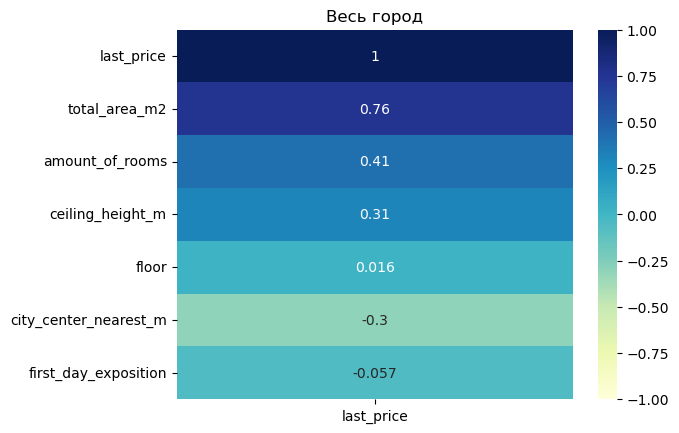

In [132]:
# вычислим корреляционную матрицу для наших факторов в всем городе
spb_corr = spb[['last_price', 'total_area_m2', 'amount_of_rooms', 'ceiling_height_m', 'floor', 'city_center_nearest_m', 'first_day_exposition']].corr()
# построим тепловую карту для столбца last_price
sns.heatmap(spb_corr[['last_price']], vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
plt.title('Весь город')
plt.show()

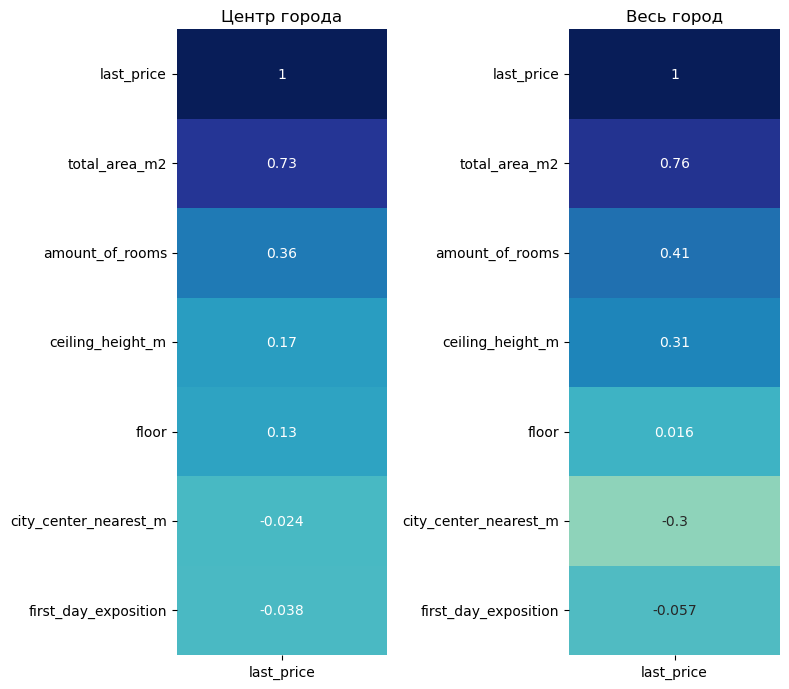

In [133]:
# склеим таблицы для наглядности
plt.figure(figsize=(8, 7))

plt.subplot(1, 2, 1)  # 1 ряд, 2 колонки, 1 график
sns.heatmap(spb_in_center_corr[['last_price']], vmin=-1, vmax=1, annot=True, cmap='YlGnBu', cbar=False)
plt.title('Центр города')

plt.subplot(1, 2, 2)  # 1 ряд, 2 колонки, 2 график
sns.heatmap(spb_corr[['last_price']], vmin=-1, vmax=1, annot=True, cmap='YlGnBu', cbar=False)
plt.title('Весь город')

plt.tight_layout()  # добавим, чтобы графики не накладывались друг на друга
plt.show()

В первом графике представлены коэффициенты корреляции Пирсона величины цены от различных факторов **в центре города**, а во втором - **по всему городу**.

Заметны только две схожести между этими графиками. Мы видим, что цена с общей площадью квартиры имеет сильную линейную зависимость, как в центре города, так и по всему городу. А также день публикации объявления с ценой не имеет связи совсем в обоих случаях.

По поводу остальных факторов корреляция имеет слабее связь в центре города, чем по всему городу.Хотя стоит вспомнить, что мы сравниваем 2 набора данных, которые не были соразмерны друг другу.

**Вывод по 3 шагу:** 

В результате анализа данных можно сделать следующие выводы:

1) **Общая площадь и цена квартир:** Большинство квартир имеют площадь от 30 до 90 кв.м., а цена за кв.м. варьируется от 70k до 120k рублей. Большинство объявлений представляют квартиры с 1 или 2 комнатами, что ожидаемо, учитывая типичный рынок. Влияние общей площади на цену выражено сильной линейной связью (~0.8).

2) **Цены и география:** Чем ближе квартира к центру Санкт-Петербурга, тем выше её цена. Центральная зона города, где квартиры особенно дорогие, находится на расстоянии 5-6 км от центра. Цены выше всего в Санкт-Петербурге, а самые низкие – в Выборге.

3) **Сезонность и временные факторы:** На цену жилья небольшое влияние имеет сезонность — спад цен наблюдается с мая по июнь, а максимумы достигаются в сентябре. Квартиры, размещенные в середине недели, имеют тенденцию к более высокой цене. При этом квартиры, размещенные на продажу в 2014 году, продавались дольше всего.

4) **Этажность и цена:** Стоимость квартир на первых этажах ниже по сравнению с другими и последними. Однако линейная зависимость эта слабая.

5) **Центр vs Весь город:** В центре города корреляция между факторами, влияющими на цену, в целом слабее, чем по всему городу. Однако сильная зависимость между ценой и общей площадью квартиры остается значимой в обоих случаях.

**Общий вывод:**

Мы провели исследование объявлений о продаже квартир в Санкт-Петербурге и ближайших населённых пунктах с целью определения факторов, влияющих на рыночную стоимость недвижимости. Исследование охватывало этапы предобработки данных, расчёта дополнительных характеристик, и детального анализа ключевых показателей.

**1. Предобработка данных:**

Мы выполнили подготовку данных, включая исправление названий столбцов, заполнение пропусков, корректировку типов данных и устранение выбросов. Это позволило очистить и стандартизировать набор данных для дальнейшего анализа.

**2. Дополнительные расчёты:**

Добавлены новые столбцы для детального анализа, такие как цена за квадратный метр, день недели, месяц и год публикации объявления. Также классифицированы этажи и рассчитаны соотношения жилой и кухонной площадей к общей площади, что позволило глубже проанализировать влияние различных факторов на стоимость жилья.

**3. Анализ данных:**

Сильная линейная зависимость между общей площадью квартиры и её ценой (~0.8). Также значительное влияние на цену оказывает удалённость от центра города: чем ближе квартира к центру Санкт-Петербурга, тем она дороже. Центральная зона с самыми высокими ценами расположена в пределах 5-6 км от центра. Стоимость квартир также варьируется в зависимости от сезона — с мая по июнь цены снижаются, а к концу лета, особенно в сентябре, наблюдается резкий рост. Квартиры на первых этажах продаются дешевле, но этот фактор оказывает лишь слабое влияние на цену.

**Заключение:**

Наш анализ показал, что основными факторами, влияющими на стоимость квартиры, являются её площадь и расположение относительно центра города. Мы подготовили базу для автоматизированной системы, которая будет отслеживать рыночную стоимость жилья, выявлять аномалии и потенциальные мошеннические действия.